  This file contains a simple implementation for Generative Adversarial Networks. Generator network tries to learn a simple 2nd or 3rd degree polynomilal. 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [75]:
#by default the function generates quadratic distribution, but any degree can be chosen
def generate_data(n=1000,degree=2):
    data=[]
    x=10*(np.random.random_sample((n,))-0.5)
    for i in range(n):
        data.append([x[i],3+x[i]**degree])
    return np.array(data)

def generate_fake_data(n,k=2):
    return np.random.uniform(-1.,1.,size=[n,k])

In [76]:
random.seed(10)
data=generate_data(200,degree=2)

Text(0.5,1,'Plot of  Real Data')

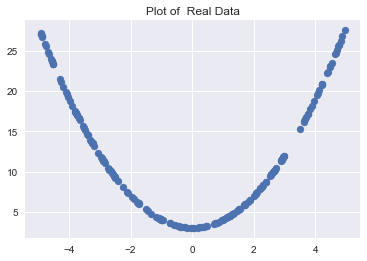

In [115]:
sns.set()
plt.scatter(data[:,0],data[:,1])
plt.title('Plot of  Real Data')

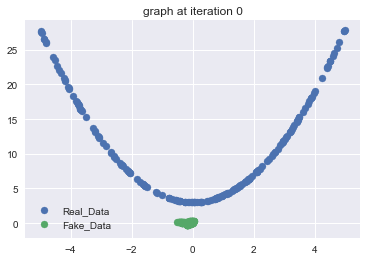

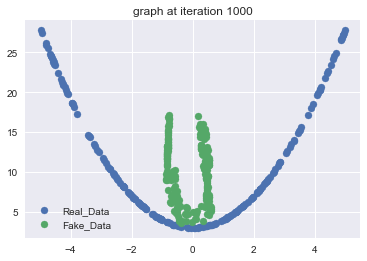

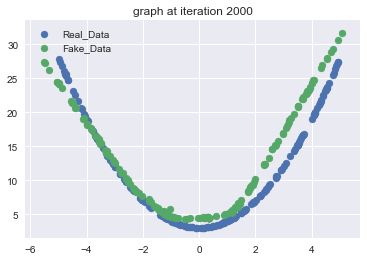

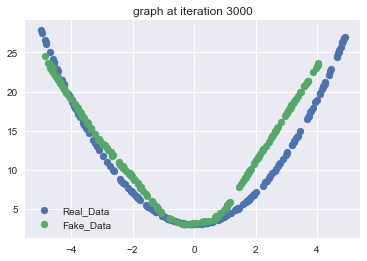

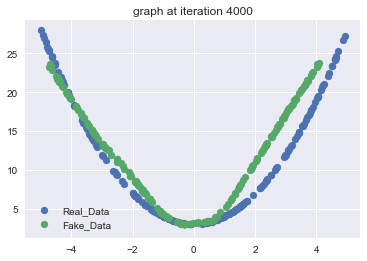

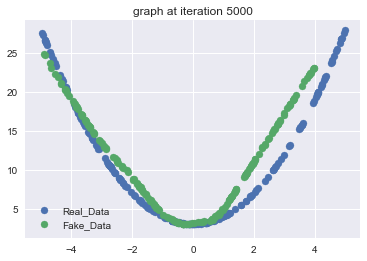

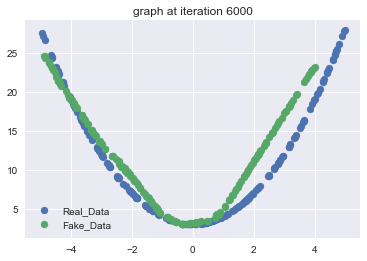

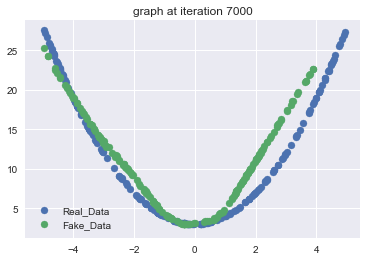

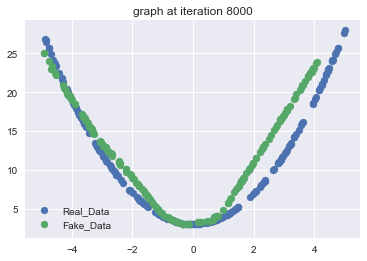

In [110]:
tf.reset_default_graph()

lr=0.001
#placeholders
X = tf.placeholder(tf.float32,[None,2]) #for discriminator
Z = tf.placeholder(tf.float32,[None,2]) #for generator


"""
Both Generator and Discriminator are 2 layer(fully connected) networks. Output of disriminator is a scalar and
of generator is same dimension(2/3 here). Reuse attribute is not required for the generator but for the sake of 
aesthetics, i wrore both generator and discriminaor function excatly same.
""" 
def generator(Z,neuron_l1=16,neuron_l2=16,reuse=False):
    with tf.variable_scope('generator',reuse=reuse):
        h1=tf.layers.dense(Z,neuron_l1,activation=tf.nn.relu)
        h2=tf.layers.dense(h1,neuron_l2,activation=tf.nn.relu)
        out=tf.layers.dense(h2,2)
    return out

def discriminator(X,neuron_l1=16,neuron_l2=16,reuse=False):
    with tf.variable_scope('discriminator',reuse=reuse):
        h1=tf.layers.dense(X,neuron_l1,activation=tf.nn.relu)
        h2=tf.layers.dense(h1,neuron_l2,activation=tf.nn.relu)
        out=tf.layers.dense(h2,1)
    return out

G_data=generator(Z)
real_logits = discriminator(X)
fake_logits = discriminator(G_data,reuse=True)

#loss function
discriminator_loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real_logits, labels=tf.ones_like(real_logits))
                                 +tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_logits, labels=tf.zeros_like(fake_logits)))

generator_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_logits, labels=tf.ones_like(fake_logits)))

#variables to be used for back prop
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="discriminator")

#optimizers
d_opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(discriminator_loss,var_list=disc_vars)
g_opt=tf.train.AdamOptimizer(learning_rate=lr).minimize(generator_loss,var_list=gen_vars)

init=tf.global_variables_initializer()

n_epochs=8000
batch_size=200


with tf.Session() as sess:
    init.run()
    for i in range(0,n_epochs+1):
        X_data=generate_data(batch_size)
        Z_data=generate_fake_data(batch_size)
        
        for j in range(12):
            disc_loss,disc_optimize=sess.run([discriminator_loss,d_opt],feed_dict={X:X_data,Z:Z_data})      
        
        for k in range(12):
            gen_loss,gen_optimize=sess.run([generator_loss,g_opt],feed_dict={Z:Z_data})

        
        if i%1000 == 0:
            g_data = sess.run(G_data, feed_dict={Z: Z_data})
            X_data_plot = plt.scatter(X_data[:,0], X_data[:,1],label='Real_Data')
            g_data_plot = plt.scatter(g_data[:,0],g_data[:,1],label='Fake_Data')
            plt.title('graph at iteration %i'%i)
            plt.legend()
            plt.show()

## 2nd run

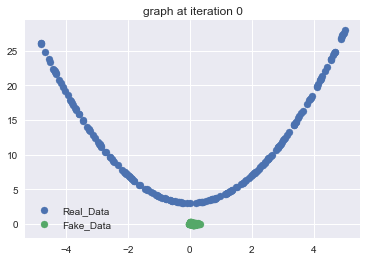

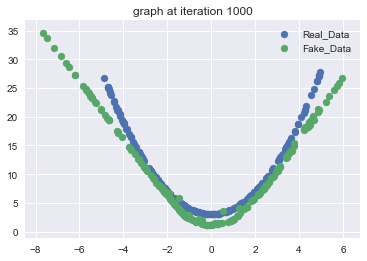

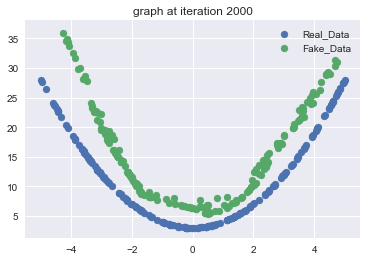

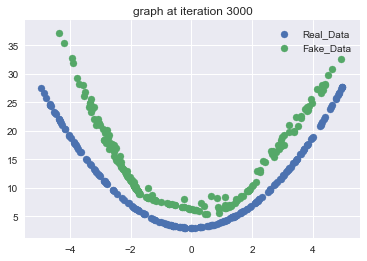

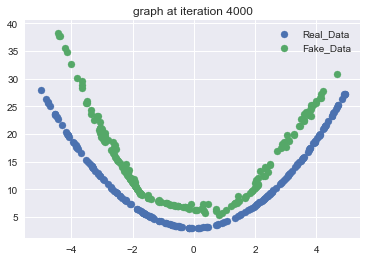

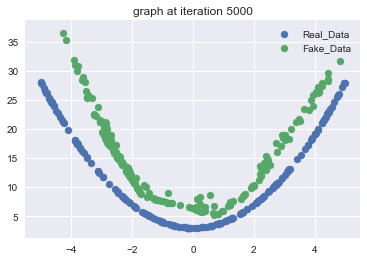

## Plots for 3rd degree polynomial

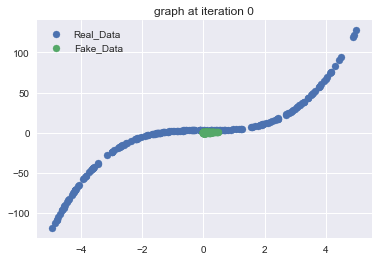

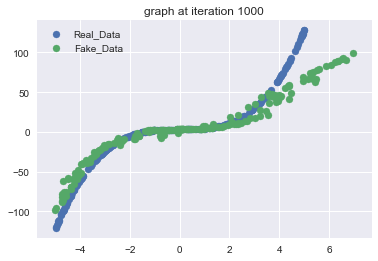

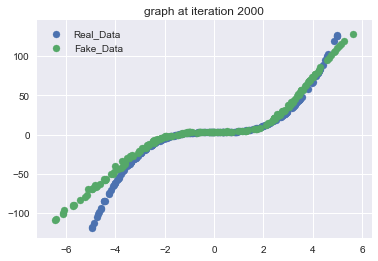

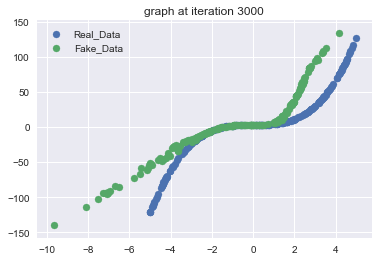

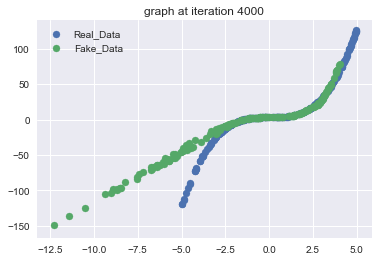

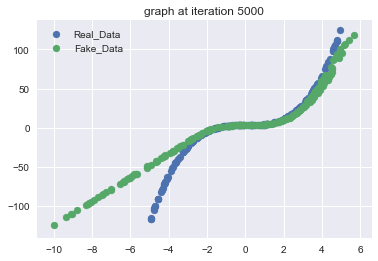